In [51]:
import sklearn as skl
import pandas as pd
import sklearn.datasets as datasets

data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = pd.Series(data.target)
df.head()

df_copy = df
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [53]:
df['target'].unique()

array([0, 1, 2])

Q1) a) There's only one category which is target, as it's the only one that's discrete. Also, target indicates that the machine learning library is using three wine classes [0,1,2] to classify the wines.

In [54]:
print('Q1)a)')
print('Categorical frequencies are:')
print(df['target'].value_counts())

Q1)a)
Categorical frequencies are:
1    71
0    59
2    48
Name: target, dtype: int64


In [55]:
print('Q1)b) Univariate Computations:')
print('')
print('Mean:')
df.drop('target', axis=1, inplace=True)
display(df.mean())
print('')
print('Standard Deviation:')
display(df.std())

Q1)b) Univariate Computations:

Mean:


alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


Standard Deviation:


alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64

In [57]:
print('Q1)b) Multivariate Computations:')
print('')
#df = df.drop(["target"], axis = 1)
print('Covariance:') #Remove lower triangle of covariance matrix along main diagonal to prevent redundant data 
df_cov = df.cov()
df_cov = df_cov.where(np.triu(np.ones(df_cov.shape)).astype(bool))
df_cov = df_cov.stack().reset_index()
df_cov.columns = ['Row','Column','Value']
display(df_cov)
print('')
print('Correlation:') #Remove lower triangle of correlation matrix along main diagonal to prevent redundant data 
df_corr = df.corr()
df_corr = df_corr.where(np.triu(np.ones(df_corr.shape)).astype(bool))
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Row','Column','Value']
display(df_corr)

Q1)b) Multivariate Computations:

Covariance:


,Row,Column,Value
0,alcohol,alcohol,0.659062
1,alcohol,malic_acid,0.085611
2,alcohol,ash,0.047115
3,alcohol,alcalinity_of_ash,-0.841093
4,alcohol,magnesium,3.139878
...,...,...,...
86,hue,od280/od315_of_diluted_wines,0.091766
87,hue,proline,17.000223
88,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines,0.504086
89,od280/od315_of_diluted_wines,proline,69.927526



Correlation:


,Row,Column,Value
0,alcohol,alcohol,1.000000
1,alcohol,malic_acid,0.094397
2,alcohol,ash,0.211545
3,alcohol,alcalinity_of_ash,-0.310235
4,alcohol,magnesium,0.270798
...,...,...,...
86,hue,od280/od315_of_diluted_wines,0.565468
87,hue,proline,0.236183
88,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines,1.000000
89,od280/od315_of_diluted_wines,proline,0.312761


In [ ]:
print('Q1)c) Group By target and calculate median for each numerical feature:')
print('')
display(df_copy.groupby(['target']).median())

Q1)c) Group By target and calculate median for each numerical feature:



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

Q1)d) Scatter Plot for pair of distinct numerical features with highest correlation:

NOTE: I manually searched through the correlation display to find it



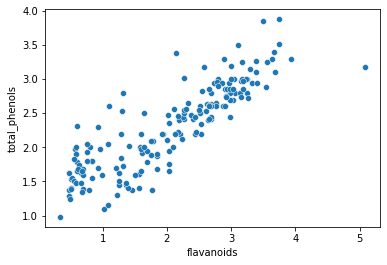

In [38]:
print('Q1)d) Scatter Plot for pair of distinct numerical features with highest correlation:')
print('')
print('NOTE: I manually searched through the correlation display to find it')
print('')
sns.scatterplot(x='flavanoids', y='total_phenols', data=df)
plt.show()

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

print('Q2)')
print('')
df_ci = pd.read_csv('country-income.csv')
print('Original Dataset (head and tail):')
display(df_ci)

print('')
df_ci.info(verbose=True)

df_ci = df_ci.replace('?',np.NaN) #Replace missing values with NaN

print('')
print('Number of missing values:')
for col in df_ci.columns:
    print('\t%s: %d' % (col,df_ci[col].isna().sum()))


print('')
print('New Dataset (head and tail):')
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #impute missing values by calculating and imputing mean

age = df_ci["Age"].values
data_clean_age = impute_mean.fit_transform(age.reshape(-1,1)) #Reshape df columns into arrays for imputing and transformation
df_ci["Age"] = data_clean_age


income = df_ci["Income"].values
data_clean_income = impute_mean.fit_transform(income.reshape(-1,1))
df_ci["Income"] = data_clean_income


ohe = OneHotEncoder(sparse = False, dtype='int64') #instantiate OHE to encode categorical labels to numerical labels, where numbers are in 64 bits integer form
ode = OrdinalEncoder(categories='auto', dtype='int64') #instantiate ODE to encode categorical labels to numerical labels, where numbers are in 64 bits integer form


region_transform = ode.fit_transform(df_ci[["Region"]]) #Use ODE for Region since there are three distinct regions that needs to be ordered
df_ci["Region"] = region_transform

shop_transform = ohe.fit_transform(df_ci[["Online Shopper"]]) #Use OHE since Online Shopper labels are nominal
df_ci["Online Shopper"] = shop_transform

display(df_ci)

Q2)

Original Dataset (head and tail):


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10 non-null     object 
 1   Age             9 non-null      float64
 2   Income          9 non-null      float64
 3   Online Shopper  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes

Number of missing values:
	Region: 0
	Age: 1
	Income: 1
	Online Shopper: 0

New Dataset (head and tail):


,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,1
1,0,32.000000,57600.000000,0
2,2,35.000000,64800.000000,1
3,0,43.000000,73200.000000,1
4,2,45.000000,76533.333333,0
5,1,40.000000,69600.000000,0
6,0,43.777778,62400.000000,1
7,1,53.000000,94800.000000,0
8,2,55.000000,99600.000000,1
9,1,42.000000,80400.000000,0


Q2) ctd.) As described in my code comments I replaced the missing data with NaN values and then imputed said NaN values using the SimpleImputer with the mean strategy. I then replaced the Categorical labels for the Region and Online Shopper columns with numerical labels by using OHE and ODE. I used ODE for Region since there are three distinct Region labels that could be ordered, while Online Shopper only has two nominal Yes or No labels; so I used OHE.

Q3)

Original Dataset (head and tail):


,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0
...,...,...,...,...
403,404,M,13.0,78.0
404,405,M,13.0,78.0
405,406,M,14.0,78.0
406,407,M,15.0,80.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   408 non-null    int64  
 1   Gender  408 non-null    object 
 2   Size    408 non-null    float64
 3   Height  408 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.9+ KB

Scatter Plot (Female height vs shoesize):



,Size
0,5.5
1,6.0
2,7.0
3,8.0
4,8.0
...,...
182,10.0
183,11.0
184,11.0
185,10.0


,Height
0,60.0
1,60.0
2,60.0
3,60.0
4,60.0
...,...
182,72.0
183,72.0
184,72.0
185,74.0


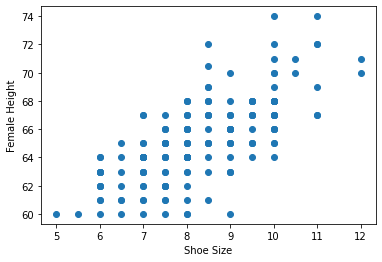


Scatter Plot (Male height vs shoesize):



,Size
187,10.5
188,9.0
189,7.5
190,8.0
191,10.0
...,...
403,13.0
404,13.0
405,14.0
406,15.0


,Height
187,63.0
188,63.0
189,64.0
190,64.0
191,64.0
...,...
403,78.0
404,78.0
405,78.0
406,80.0


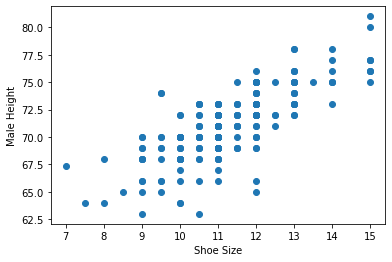

--------------------
Pearson Correlation:
--------------------


,Correlation Between Height and Size for each Gender
Gender,
F,0.707812
M,0.767709


In [9]:
import sklearn as skl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


print('Q3)')
print('')
df_ss = pd.read_csv('shoesize.csv')
print('Original Dataset (head and tail):')
display(df_ss)
print('')
df_ss.info(verbose=True)

print('')
print('Scatter Plot (Female height vs shoesize):')
print('')

#Retrieving data subsets and assigning them as their own df
df_fs = df_ss[df_ss.Gender=="F"][["Size"]]
df_fh = df_ss[df_ss.Gender=="F"][["Height"]]

display(df_fs)
display(df_fh)

f_scatter = plt.scatter(df_fs['Size'], df_fh['Height'])
plt.xlabel('Shoe Size')
plt.ylabel('Female Height')

plt.show()

print('')
print('Scatter Plot (Male height vs shoesize):')
print('')

df_ms = df_ss[df_ss.Gender=="M"][["Size"]]
df_mh = df_ss[df_ss.Gender=="M"][["Height"]]

display(df_ms)
display(df_mh)

m_scatter = plt.scatter(df_ms['Size'], df_mh['Height'])
plt.xlabel('Shoe Size')
plt.ylabel('Male Height')

plt.show()

print('--------------------')
print('Pearson Correlation:')
print('--------------------')


df_ss.groupby('Gender').apply(lambda x: x.Size.corr(x.Height)).rename('Correlation Between Height and Size for each Gender').to_frame()

Q3)(ctd.) From the scatter plot and the coefficient correlation it can be educed (derived latent info from data) that for Males there's a stronger, positive correlation between shoe size and height relative to their Female counterparts. (NOTE: There are also 34 more Male data points compared to Female data points so that may slightly affect the correlation)

Also, I made the separate single-columned df for Size and Height for Female and Male respectively so I can easily, separately plot the scatter plot for each Gender from the main df.

Q4)


PCA Scatter Plot (PC0 vs PC1):


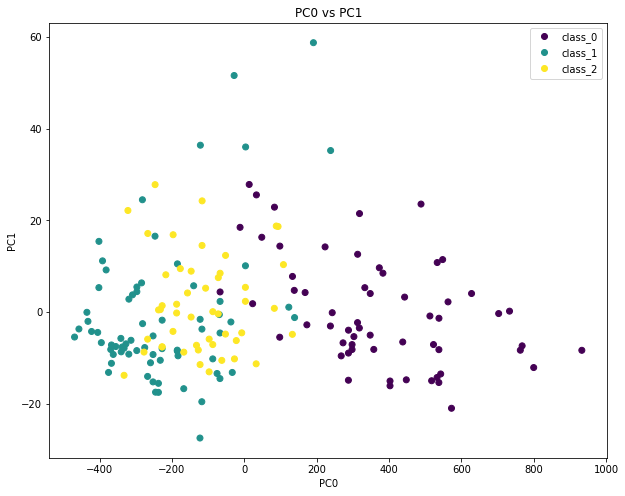

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

print('Q4)')

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
print('')



# define PCA object
pca = PCA()


print('')
print('PCA Scatter Plot (PC0 vs PC1):')

plt.figure(figsize=(10,8))
wine_unscaled, wine_unscaled_target = data['data'], data['target']

# transforming the data using PCA object
pr_cus = pca.fit_transform(wine_unscaled)

plot = plt.scatter(pr_cus[:,0], pr_cus[:,1], c=wine_unscaled_target)
plt.legend(handles=plot.legend_elements()[0], labels=list(data['target_names']))
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PC0 vs PC1")
plt.show()

55.4 % of variance explained by 2 components.


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

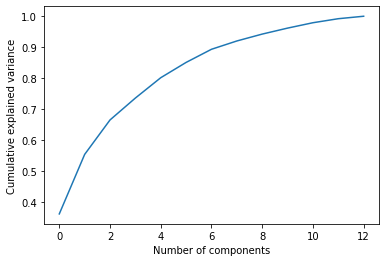

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #Plot cumulative explained variance as a ratio with respect to no. of components
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

pca_50 = PCA(.50)
pca_50.fit_transform(wine_scaled)
print(round(pca_50.explained_variance_ratio_.sum()*100, 1),"% of variance explained by",pca_50.n_components_,"components.")
pca.explained_variance_ratio_[:13]

Q4)(ctd.) 

There is a lot of overlap; especially between class 1 and class 2, when viewing the scatter plot of the two principal components. While for class 3 there are some overlap but a lot of its data is distinctive from the other two.

This may be happening as the highest explained variance from the 13 variables (not inc. target) and 178 observations is shown to be ~36.2% and the lowest is ~0.8%, second highest is 19.2% etc. Hence 55.4% of the cumulative explained variance can be explained by the first two components (*36.2% + 19.2% = 55.4%*). Which explains the large overlap between class 1 and class 2 but the high variance in class 3, as the first two principal components (the ones I chosed to plot) account for over half of the total explained variance in the entire dataset but there are still more variance to be explained at higher dimensionlity, especially with 13 variables, so most of the data provided by the two components will have a bulk of the  variance but not all of it.

Since this is the PCA variance that was calculated, it means that prior to PCA transformation; the data itself has low variance overall, as the PCA transformation will still keep the total variance the same but using PCA; the variance will be redistributed in the most unequal way possible *i.e.* the first variable not only explains the most variance among the new variables, but the most variance a single variable can possibly explain. 

In order to alleviate the problem of low variance for classes 1 and 2 and parts of class3, we can apply more dimensionality reduction on the PCA dataset to make the difference in variance more pronounced between the components in the transformed dataset while keeping total variance the same and **MOST IMPORTANTLY** we can scale the PCA data itself as PCA is sensitive to the scale, so if we normalized each feature by StandardScaler we can see a better result hence making the 3 target classes more distinctive.  


Scaled PCA Dataset (head and tail):


,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,2
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,2
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,2
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,2



Standardized & Scaled PCA Scatter Plot (PCO VS PC1):



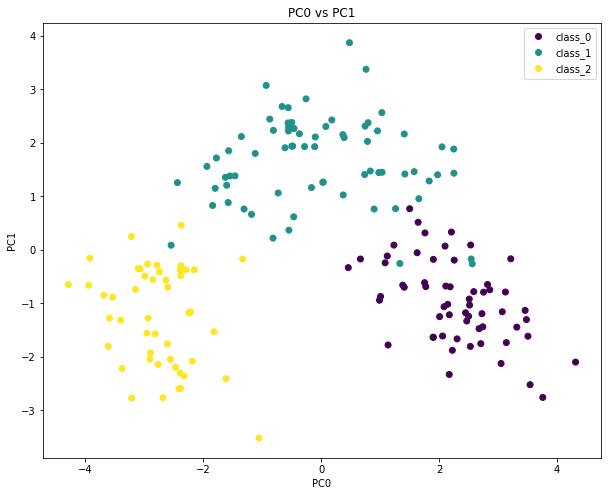

In [34]:
from sklearn.pipeline import Pipeline

df['target'] = data['target']

wine = df.drop('target', axis =1)
# scale the wine data in preprocessing 
wine_scaled = preprocessing.scale(wine)

# fit the PCA model to our data and apply the dimensionality reduction
prin_comp = pca.fit_transform(wine_scaled)
# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)
pca_df['target'] = df['target']

print('Scaled PCA Dataset (head and tail):')
display(pca_df)
print('')

print('Standardized & Scaled PCA Scatter Plot (PCO VS PC1):')
print('')

#StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1
plt.figure(figsize=(10,8))
pr_cs = pipe.fit_transform(wine_scaled)
plot = plt.scatter(pr_cs[:,0], pr_cs[:,1], c=data["target"])
plt.legend(handles=plot.legend_elements()[0], labels=list(data['target_names']))
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PC0 vs PC1")
plt.show()

Q4)(ctd. part 2)

There is now a lot of variance between all three classes and they are quite distinctive from each other. There are only a few data points that are overlap but they can be considered outliers of each classes.